In [1]:
!pip install tensorflow-gpu

     |████████████████████████████████| 421.8MB 34kB/s 
     |████████████████████████████████| 3.9MB 42.5MB/s 
     |████████████████████████████████| 450kB 46.1MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=e46b3d250104496e760933924d1d622dda0da1b739bfb58dc1518c94d0502375
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow 2.2.0rc4 has requirement gast==0.3.3, but you'll have gast 0.2.2 which is incompatible.
ERROR: tensorflow 2.2.0rc4 has requirement tensorboard<2.3.0,>=2.2.0, but you'll have tensorboard 2.1.1 which is incompatible.
ERROR: tensorflow 2.2.0rc4 has requirement tensorflow-estimator<2.3.0,>=2.2.0, but you'll have tensorflow-estimator 2.1.0 which is incompatible.
ERROR: tensorflow-probability 0.10.0rc0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: tensorboard 2.2.1
    Unins

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense,Conv1D,MaxPool1D,Dropout,BatchNormalization
from tensorflow.keras.optimizers import Adam
print(tf.__version__)

2.1.0


In [0]:
from sklearn import datasets,metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [0]:
cancer = datasets.load_breast_cancer()

In [8]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [10]:
X = pd.DataFrame(data=cancer.data,columns=cancer.feature_names)
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [12]:
y = cancer.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [13]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2 , random_state = 0 ,stratify = y)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((455, 30), (114, 30), (455,), (114,))

In [0]:
# X_train = X_train.reshape(455,30,1)
# X_test = X_test.reshape(114,30,1)
# Doesn't work because they are pandas dataframes not numpy arrays

In [17]:
X_train.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
54,15.100,22.02,97.26,712.8,0.09056,0.07081,0.05253,0.03334,0.1616,0.05684,0.3105,0.8339,2.097,29.910,0.004675,0.01030,0.01603,0.009222,0.01095,0.001629,18.100,31.69,117.70,1030.0,0.1389,0.20570,0.27120,0.15300,0.2675,0.07873
114,8.726,15.83,55.84,230.9,0.11500,0.08201,0.04132,0.01924,0.1649,0.07633,0.1665,0.5864,1.354,8.966,0.008261,0.02213,0.03259,0.010400,0.01708,0.003806,9.628,19.62,64.48,284.4,0.1724,0.23640,0.24560,0.10500,0.2926,0.10170
256,19.550,28.77,133.60,1207.0,0.09260,0.20630,0.17840,0.11440,0.1893,0.06232,0.8426,1.1990,7.158,106.400,0.006356,0.04765,0.03863,0.015190,0.01936,0.005252,25.050,36.27,178.60,1926.0,0.1281,0.53290,0.42510,0.19410,0.2818,0.10050
176,9.904,18.06,64.60,302.4,0.09699,0.12940,0.13070,0.03716,0.1669,0.08116,0.4311,2.2610,3.132,27.480,0.012860,0.08808,0.11970,0.024600,0.03880,0.017920,11.260,24.39,73.07,390.2,0.1301,0.29500,0.34860,0.09910,0.2614,0.11620
52,11.940,18.24,75.71,437.6,0.08261,0.04751,0.01972,0.01349,0.1868,0.06110,0.2273,0.6329,1.520,17.470,0.007210,0.00838,0.01311,0.008000,0.01996,0.002635,13.100,21.33,83.67,527.2,0.1144,0.08906,0.09203,0.06296,0.2785,0.07408


In [0]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [0]:
X_train = X_train.reshape(455,30,1)
X_test = X_test.reshape(114,30,1)

In [37]:
epochs = 50
model = Sequential()
model.add(Conv1D(filters = 32 , kernel_size= 2, activation= "relu" , input_shape = (30,1)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(filters = 64 , kernel_size= 2, activation= "relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64,activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(1,activation="sigmoid"))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_7 (Conv1D)            (None, 29, 32)            96        
_________________________________________________________________
batch_normalization_6 (Batch (None, 29, 32)            128       
_________________________________________________________________
dropout_6 (Dropout)          (None, 29, 32)            0         
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 28, 64)            4160      
_________________________________________________________________
batch_normalization_7 (Batch (None, 28, 64)            256       
_________________________________________________________________
dropout_7 (Dropout)          (None, 28, 64)            0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1792)             

In [0]:
model.compile(optimizer=Adam(lr=0.00005),loss="binary_crossentropy",metrics=["accuracy"])

In [39]:
history = model.fit(X_train,y_train,epochs=epochs , validation_data=(X_test,y_test),verbose = 1)

Train on 455 samples, validate on 114 samples
Epoch 1/50
455/455 [==============================] - 1s 3ms/sample - loss: 0.6946 - accuracy: 0.6791 - val_loss: 0.6502 - val_accuracy: 0.8684
Epoch 2/50
455/455 [==============================] - 0s 379us/sample - loss: 0.5813 - accuracy: 0.7604 - val_loss: 0.6014 - val_accuracy: 0.9123
Epoch 3/50
455/455 [==============================] - 0s 368us/sample - loss: 0.4120 - accuracy: 0.8132 - val_loss: 0.5624 - val_accuracy: 0.9123
Epoch 4/50
455/455 [==============================] - 0s 376us/sample - loss: 0.3347 - accuracy: 0.8549 - val_loss: 0.5266 - val_accuracy: 0.9123
Epoch 5/50
455/455 [==============================] - 0s 373us/sample - loss: 0.3035 - accuracy: 0.8725 - val_loss: 0.4930 - val_accuracy: 0.9211
Epoch 6/50
455/455 [==============================] - 0s 400us/sample - loss: 0.2637 - accuracy: 0.8791 - val_loss: 0.4603 - val_accuracy: 0.9211
Epoch 7/50
455/455 [==============================] - 0s 376us/sample - loss: 0.

In [0]:
def plot_learningCurve(history,epochs):
  # Plot the training and validation accuracy valeus
  epoch_range = range(1,epochs+1)
  plt.plot(epoch_range,history.history['accuracy'])
  plt.plot(epoch_range,history.history['val_accuracy'])
  plt.title("Model Accuracy")
  plt.xlabel("Epoch")
  plt.ylabel("Accuracy")
  plt.legend(["Train","Val"],loc = "upper left")
  plt.show()
  # Plot the training and validation accuracy valeus
  epoch_range = range(1,epochs+1)
  plt.plot(epoch_range,history.history['loss'])
  plt.plot(epoch_range,history.history['val_loss'])
  plt.title("Model loss")
  plt.xlabel("Epoch")
  plt.ylabel("loss")
  plt.legend(["Train","Val"],loc = "upper left")
  plt.show()



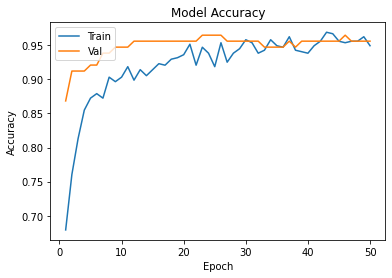

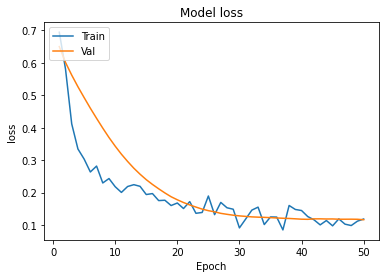

In [42]:
plot_learningCurve(history,epochs=epochs)  # We are underfitting here